### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

#### Goals of the Case Study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### 1. Importing necessary libraries for the case study

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# Loading data to a dataframe.
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Keeping one copy of the original data frame for inserting lead values later.
df_orig = data.copy()

### 2. Data inspection & Data cleaning

In [4]:
# Checking the shape to know the number of rows and columns.
data.shape

(9240, 37)

In [5]:
# Checking the data type of columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Checking imbalance for the target varible "Converted" 

In [6]:
data['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

The target variable is not imbalanced, hence we can proceed with further analysis for model building.

#### Checking whether there are any duplicates present in the data set using the unique ID - Prospect ID

In [7]:
# Checking duplicates.
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

No duplicates found.

In [8]:
# Describing the data set
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Checking the number of null values, followed by null value %

In [9]:
# Finding the number of null values in columns.
data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [10]:
# Checking the null value percentage of each column.
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

#### The following columns are having more than 35% (> 3000 numbers) null values and shall be dropped before Model Building.

-  Failing to do so will affect the performance of our Model.

-  How did you hear about X Education :               7250
-  Lead Profile :                                     6855
-  Lead Quality :                                     4767
-  Asymmetrique Profile Score :                       4218
-  Asymmetrique Activity Score :                      4218
-  Asymmetrique Profile Index :                       4218
-  Asymmetrique Activity Index :                      4218
-  City :                                             3669
-  Specialization :                                   3380
-  Tags :                                             3353


In [11]:
# Dropping the columns having more than 3000 null values.
for col in data.columns:
    if data[col].isnull().sum() > 3000:
        data.drop(col,1,inplace=True)

In [12]:
# Checking the dataframe after dropping the columns.
data.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Do Not Call                                         0
Last Notable Activity                               0
A free copy of Mastering The

#### Removing columns having high number of "Select" values

We shall remove the columns having high number of "Select" values. These values are coming from the dropdown menus when nothing is selected. A higher number of "Select" values will affect our model building negatively and we shall drop those columns.

In [13]:
# Analysing the columns for finding the high number of "select" values in the columns.
# Analysing the columns having less number of variance in the values of a column. 

for c in data:
    print(data[c].astype('category').value_counts())
    print("\n______________________________________\n")

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64

______________________________________

660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64

______________________________________

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

______________________________________


#### The following Columns are having high number of "select" values. These columns shall be dropped before model building.

-  Lead Profile
-  Specialization
-  How did you hear about X Education
-  Lead Profile
-  City

In [14]:
# Dropping above columns.

dropColumns = ['Lead Profile','Specialization','How did you hear about X Education','Lead Profile','City']
data.drop(data[dropColumns], axis=1, inplace=True)

#### Removing columns not having variance

Features which are constant (not having required variance) can be removed before modelling.

#### The following columns are not having much variance.These columns shall be dropped before model building.

- What matters most to you in choosing a course
-  Do Not Call
-  Search
-  Magazine
-  Newspaper Article
-  X Education Forums
-  Newspaper
-  Digital Advertisement
-  Through Recommendations
-  Receive More Updates About Our Courses
-  Update me on Supply Chain Content
-  Get updates on DM Content
-  I agree to pay the amount through cheque

In [15]:
# Dropping above columns.

dropColumns = ['What matters most to you in choosing a course', 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
data.drop(data[dropColumns], axis=1, inplace=True)


In [16]:
# Checking the data after dropping the columns.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

#### Converting "Selected" to Nan for remainig columns

In [17]:
# If the customer is not selecting any value from the dropdown, it takes the default value as "select" This is as good as Null and shall be converted to Nan
# Converting 'Select' values to NaN.

data = data.replace('Select', np.nan)

In [18]:
# Dropping Prospect ID and Lead Number as they are unique identifiers and will not help for prediction.

dropColumns = ['Prospect ID','Lead Number']
data.drop(data[dropColumns], axis=1, inplace=True)

#### Removing non-relevant columns from the data after verifying the dataset

In [19]:
# Dropping the column 'Country' and 'Last Notable Activity' as it is of no relevance for model building.

data.drop('Country',1,inplace=True)
data.drop('Last Notable Activity',1,inplace=True)

In [20]:
# Checking the nullvalue percentage of remaining columns after dropping.

data.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
A free copy of Mastering The Interview       0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
dtype: int64

In [21]:
# Removing rows with null values from the following columns.

# What is your current occupation           2690
# Page Views Per Visit                       137
# TotalVisits                                137
# Last Activity                              103
# Lead Source                                 36

In [22]:
# Removing the null values.

data=data[~pd.isnull(data['What is your current occupation'])]

In [23]:
# Removing the null values.

data=data[~pd.isnull(data['Page Views Per Visit'])]

In [24]:
# Removing the null values.

data=data[~pd.isnull(data['TotalVisits'])]

In [25]:
# Removing the null values.

data=data[~pd.isnull(data['Last Activity'])]

In [26]:
# Removing the null values.

data=data[~pd.isnull(data['Lead Source'])]

In [27]:
data.shape

(6391, 10)

In [28]:
# Checking the nullvalue percentage of remaining columns after dropping.

data.isnull().sum().sort_values(ascending=False)

A free copy of Mastering The Interview    0
What is your current occupation           0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
dtype: int64

####  Converting the boolean features to "0" and "1" 
The Boolean features ('Yes' / 'No') should be mapped to "0" and "1" to prepare them for modeling.

In [29]:
# Converting the boolean column "Do Not Email" to 0 and 1.

data['Do Not Email'] = data['Do Not Email'].map(dict(Yes=1, No=0))

In [30]:
# Converting the boolean column "A free copy of Mastering The Interview" to 0 and 1.

data['A free copy of Mastering The Interview'] = data['A free copy of Mastering The Interview'].map(dict(Yes=1, No=0))

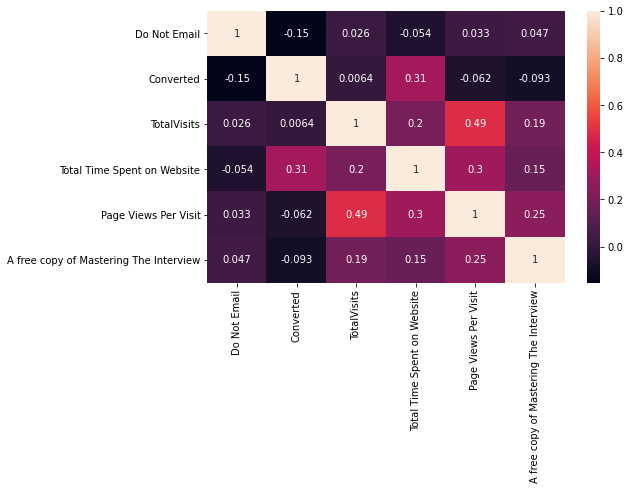

In [31]:
# Correlation Heat map for the numeric features.

plt.figure(figsize = (8,5))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

The heatmap looks good for model building without much correlation.

#### Dummyfication
The Categorical features should be identified for creating Dummy variables for them.

In [32]:
# Listing all categorical variables.

for c in data:
    print(data[c].astype('category').value_counts())
    print("______________________________________")

Landing Page Submission    3643
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64
______________________________________
Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
testone                 1
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
______________________________________
0    5945
1     446
Name: Do Not Email, dtype: int64
______________________________________
0    3326
1    3065
Name: Converted, dtype: int64
______________________________________
0.0      1347
2.0      1227
3.0       940
4.0       825
5.0       578
6.0       337
1.0       270
7.0       225
8.0       163
9.0    

In [33]:
#Lising the categorical columns.

data.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [34]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(data[['Lead Origin','Lead Source','Last Activity','What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe

data = pd.concat([data, dummy1], axis=1)

In [35]:
# Checking the data frame after adding dummy variables.

data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
# As we have created dummies for the below variables, we can drop them.

data = data.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation'], 1)

In [37]:
# Checking the dataframe after removing the variables.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 9239
Data columns (total 44 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6391 non-null   int64  
 1   Converted                                             6391 non-null   int64  
 2   TotalVisits                                           6391 non-null   float64
 3   Total Time Spent on Website                           6391 non-null   int64  
 4   Page Views Per Visit                                  6391 non-null   float64
 5   A free copy of Mastering The Interview                6391 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6391 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6391 non-null   uint8  
 8   Lead Origin_Lead Import                               6391

In [38]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [39]:
data.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'La

### 3. Train-Test Splitting and Logistic Regression Model Building:

#### The following steps are followed in building a model:

- Importing necessary packages for model preprocessing and model building.
- Splitting the train data and test data at 70% and 30%.
- Scaling the Numeric features using MinMaxScaler.
- Building the model.
- Feature selection using RFE followed by feature reduction by dropping one feature at a time.
- Building the model and fitting the training data.

In [40]:
# Importing necessary libraries.

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [41]:
# Storing the the target variable "Converted" in y.

y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [42]:
# Storing the feature variables in X.

X=data.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Splitting the data into Train and Testat 70% and 30%

In [43]:
# Splitting the data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=101)

#### Scaling the numeric features using Min-Max Scaler

In [44]:
# The numeric columns needs to be scaled before proceeding with Model building. We are using MinMaxScaler here.

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4453,0,0.017391,0.693222,0.036364,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9205,0,0.052174,0.169894,0.036364,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5854,0,0.043478,0.108715,0.090909,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6655,0,0.043478,0.073063,0.090909,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
443,0,0.017391,0.047095,0.036364,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [45]:
# Checking the colmn types of X_train.

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4473 entries, 4453 to 7230
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          4473 non-null   int64  
 1   TotalVisits                                           4473 non-null   float64
 2   Total Time Spent on Website                           4473 non-null   float64
 3   Page Views Per Visit                                  4473 non-null   float64
 4   A free copy of Mastering The Interview                4473 non-null   int64  
 5   Lead Origin_Landing Page Submission                   4473 non-null   uint8  
 6   Lead Origin_Lead Add Form                             4473 non-null   uint8  
 7   Lead Origin_Lead Import                               4473 non-null   uint8  
 8   Lead Source_Direct Traffic                            4

#### Building the Model

In [46]:
# Building the Logistic Regression Model.

logmodel = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logmodel, 20)
rfe = rfe.fit(X_train, y_train)

#### Feature selection using RFE

In [47]:
#Listing the RFE supported columns along with RFE ranking.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 19),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 13),
 ('Lead Source_Press_Release', False, 20),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 21),
 ('Lead Source_testone', False, 14),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounce

In [48]:
# list of RFE supported columns.

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Marked Spam',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [49]:
# Defining a function to generate the model by passing the model name and the columns used for the model 

def gen_model(model_no, cols):
    X_train_sm = sm.add_constant(X_train[cols])
    model_no = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = model_no.fit()
    print (res.summary())
    return res


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calcVIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Model 1

In [51]:
# Generate the first model using the RFE features

logm1 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm1, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4452
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.5
Date:                Wed, 08 Sep 2021   Deviance:                       4073.0
Time:                        10:11:44   Pearson chi2:                 4.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
4,Lead Origin_Lead Add Form,81.05
6,Lead Source_Reference,64.76
7,Lead Source_Welingak Website,17.47


In [52]:
res

#### Model 2

#### The variables 'What is your current occupation_Housewife' and 'Last Activity_Email Marked Spam'  are having very high coefficients and P values. Hence dropping them one by one.

In [53]:
# Dropping the variable 'What is your current occupation_Housewife' from the model.

cols=cols.drop('What is your current occupation_Housewife',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4453
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.0
Date:                Wed, 08 Sep 2021   Deviance:                       4080.0
Time:                        10:11:44   Pearson chi2:                 4.91e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
4,Lead Origin_Lead Add Form,81.05
6,Lead Source_Reference,64.75
7,Lead Source_Welingak Website,17.47


#### Model 3

In [54]:
# Dropping the variable 'Last Activity_Email Marked Spam' from the model.

cols=cols.drop('Last Activity_Email Marked Spam',1)
logm3 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm3, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4454
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.1
Date:                Wed, 08 Sep 2021   Deviance:                       4082.1
Time:                        10:11:44   Pearson chi2:                 4.92e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
4,Lead Origin_Lead Add Form,81.05
6,Lead Source_Reference,64.75
7,Lead Source_Welingak Website,17.47


#### Model 4

#### The column "Lead Origin_Lead Add Form" is having business relevance. Hence not dropping it.

In [55]:
# Dropping the column having the next highest VIF value -'Lead Source_Reference' .

cols = cols.drop('Lead Source_Reference',1)
logm4 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm4, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4455
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.5
Date:                Wed, 08 Sep 2021   Deviance:                       4083.1
Time:                        10:11:45   Pearson chi2:                 4.91e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
15,What is your current occupation_Unemployed,6.23
3,Page Views Per Visit,4.60
1,TotalVisits,2.96


#### Model 5

In [56]:
# Dropping the column having next highest VIF value.

cols = cols.drop('What is your current occupation_Unemployed',1)
logm5 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm5, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4456
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2044.3
Date:                Wed, 08 Sep 2021   Deviance:                       4088.6
Time:                        10:11:45   Pearson chi2:                 4.91e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,3.50
1,TotalVisits,2.89
2,Total Time Spent on Website,1.99


### 4. Get the predictions on the training dataset with the final model.

#### Using the cut-off as 0.5 for the initial predictions.

In [57]:
# Getting the predicted values on the train set

X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4453    0.898313
9205    0.822929
5854    0.366308
6655    0.329706
443     0.144179
5804    0.995469
4004    0.982377
2626    0.608655
301     0.296950
7114    0.137571
dtype: float64

In [58]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
4453,1,0.898313,4453
9205,1,0.822929,9205
5854,1,0.366308,5854
6655,0,0.329706,6655
443,1,0.144179,443


In [59]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Checking the result
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
4453,1,0.898313,4453,1
9205,1,0.822929,9205,1
5854,1,0.366308,5854,0
6655,0,0.329706,6655,0
443,1,0.144179,443,0


#### Evaluation Metrics for the Train dataset
- Derive the Classification report and Classification metrics with the initial cutoff and predictions

In [60]:
from sklearn.metrics import classification_report

In [61]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2317
           1       0.81      0.75      0.78      2156

    accuracy                           0.80      4473
   macro avg       0.80      0.79      0.79      4473
weighted avg       0.80      0.80      0.80      4473



In [62]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [63]:
def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    # Checking the overall accuracy.
    Accuracy = metrics.accuracy_score(actual, predicted)

    TN = confusion[0,0] # True Negatives
    FP = confusion[0,1] # False Positives
    FN = confusion[1,0] # False Negatives
    TP = confusion[1,1] # True Positives 

    # Calculating the different Metrics
    Sensitivity = TP / float(TP+FN) 
    Specificity = TN / float(TN+FP) 
    Precision   = TP / float(TP+FP) 
    Recall      = TN / float(TN+FP) 
    FPR = (FP/ float(TN+FP))        
    PPV = (TP / float(TP+FP))        
    NPV = (TN / float(TN+ FN))      
    
    F1 = 2*(Precision*Recall)/(Precision+Recall)

    # Print the Metrics
    print (f'The Confusion Matrix is \n {confusion}')
    print (f'The Accuracy is    : {round (Accuracy,2)} ({Accuracy})')
    print (f'The Sensitivity is : {round (Sensitivity,2)} ({Sensitivity})')
    print (f'The Specificity is : {round (Specificity,2)} ({Specificity})')
    print (f'The Precision is   : {round (Precision, 2)} ({Precision})')
    print (f'The Recall is      : {round (Recall, 2)} ({Recall})')
    print (f'The f1 score is    : {round (F1, 2)} ({F1})')
    print (f'The False Positive Rate is       : {round (FPR, 2)} ({FPR})')
    print (f'The Positive Predictive Value is : {round (PPV, 2)} ({PPV})')
    print (f'The Negative Predictive Value is : {round (NPV, 2)} ({NPV})')

In [64]:
def plot_confusion_metrics(actual, predicted):
    sns.set_style('white')
    cm = confusion_matrix(actual, predicted)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('True Converted and Predicted Converted Confusion Matrix', fontsize=14)
    plt.ylabel('True Converted', fontsize=14)
    plt.xlabel('Predicted Converted', fontsize=14)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=14)
    plt.yticks(tick_marks, classNames, fontsize=14)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=14, ha='center')
    plt.show()

In [65]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

The Confusion Matrix is 
 [[1938  379]
 [ 534 1622]]
The Accuracy is    : 0.8 (0.7958864296892466)
The Sensitivity is : 0.75 (0.7523191094619666)
The Specificity is : 0.84 (0.8364264134656884)
The Precision is   : 0.81 (0.8105947026486756)
The Recall is      : 0.84 (0.8364264134656884)
The f1 score is    : 0.82 (0.8233079871012892)
The False Positive Rate is       : 0.16 (0.16357358653431162)
The Positive Predictive Value is : 0.81 (0.8105947026486756)
The Negative Predictive Value is : 0.78 (0.7839805825242718)


#### Plotting the confusion matrix

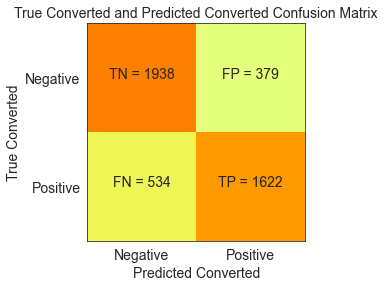

In [66]:
plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#### The cut-off needs to be adjusted for better modelling. Hence deriving the Area under the ROC curve for the cut-off and predictions.

In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [68]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                          y_train_pred_final.Converted_prob, drop_intermediate = False )

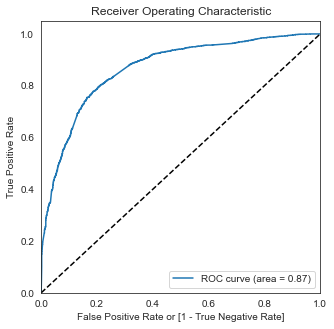

In [69]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


#### Getting the Optimal cutoff and final evaluation Metrics for Train Dataset
- Calculate the predicted values for the different cut-offs to arrive at the optimal cutoff

In [70]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4453,1,0.898313,4453,1,1,1,1,1,1,1,1,1,1,0
9205,1,0.822929,9205,1,1,1,1,1,1,1,1,1,1,0
5854,1,0.366308,5854,0,1,1,1,1,0,0,0,0,0,0
6655,0,0.329706,6655,0,1,1,1,1,0,0,0,0,0,0
443,1,0.144179,443,0,1,1,0,0,0,0,0,0,0,0


#### Plot the Sensitivity / Specificity curve for the different cut-offs and identify the optimal cut-off


In [71]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

#     TN = confusion[0,0] 
#     FP = confusion[0,1] 
#     FN = confusion[1,0] 
#     TP = confusion[1,1]  
    
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.482003     1.000000     0.000000
0.1          0.1  0.560698     0.988868     0.162279
0.2          0.2  0.710038     0.942022     0.494174
0.3          0.3  0.761681     0.904917     0.628399
0.4          0.4  0.792980     0.807514     0.779456
0.5          0.5  0.795886     0.752319     0.836426
0.6          0.6  0.783814     0.690167     0.870954
0.7          0.7  0.746032     0.564471     0.914976
0.8          0.8  0.709367     0.452226     0.948640
0.9          0.9  0.643863     0.278757     0.983599


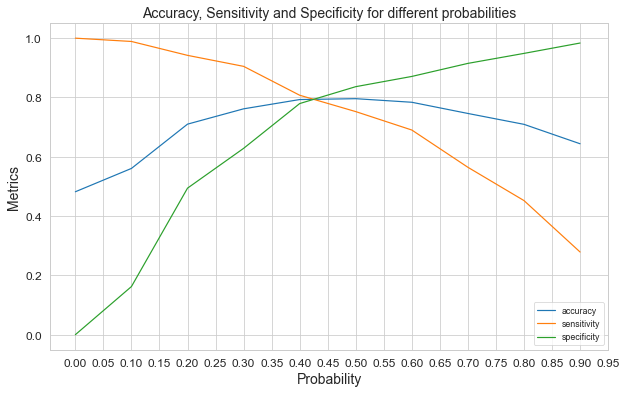

In [72]:
# Plotting Accuracy Sensitivity and Specificity for different probabilities.

sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for different probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

#### From the above curve, 0.43 can be taken as the optimum cutoff probability. This cutoff shall be used to get the final_Predictions and the metrics for the Predictions.

In [73]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
4453,1,0.898313,4453,1,1,1,1,1,1,1,1,1,1,0,1
9205,1,0.822929,9205,1,1,1,1,1,1,1,1,1,1,0,1
5854,1,0.366308,5854,0,1,1,1,1,0,0,0,0,0,0,0
6655,0,0.329706,6655,0,1,1,1,1,0,0,0,0,0,0,0
443,1,0.144179,443,0,1,1,0,0,0,0,0,0,0,0,0


#### Deriving Metrices for Training dataset

In [74]:
# Deriving all necessary Metrics for the Training dataset for a cut-off 0.43

print (f'Final Evaluation Metrics for the Training Dataset ')
print (f'-------------------------------------------------')

get_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

Final Evaluation Metrics for the Training Dataset 
-------------------------------------------------
The Confusion Matrix is 
 [[1849  468]
 [ 450 1706]]
The Accuracy is    : 0.79 (0.7947686116700201)
The Sensitivity is : 0.79 (0.7912801484230055)
The Specificity is : 0.8 (0.7980146741476046)
The Precision is   : 0.78 (0.7847286108555658)
The Recall is      : 0.8 (0.7980146741476046)
The f1 score is    : 0.79 (0.7913158787275504)
The False Positive Rate is       : 0.2 (0.20198532585239534)
The Positive Predictive Value is : 0.78 (0.7847286108555658)
The Negative Predictive Value is : 0.8 (0.80426272292301)


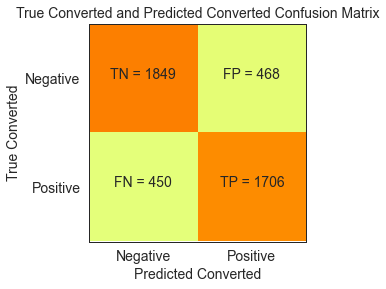

In [75]:
# Confusion metrics for final predicted on training data.

plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

#### Classification report

In [76]:
# Classification report for the training dataset
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2317
           1       0.78      0.79      0.79      2156

    accuracy                           0.79      4473
   macro avg       0.79      0.79      0.79      4473
weighted avg       0.79      0.79      0.79      4473



#### Assign a Lead Score to the Training dataset based on the Conversion probability of the final_Predictions

In [77]:
# Assign a Lead score based on the predictions

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
4453,1,0.898313,4453,1,90
9205,1,0.822929,9205,1,82
5854,1,0.366308,5854,0,37
6655,0,0.329706,6655,0,33
443,1,0.144179,443,0,14


In [78]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
4453,1,0.898313,4453,1,1,1,1,1,1,1,1,1,1,0,1,90
9205,1,0.822929,9205,1,1,1,1,1,1,1,1,1,1,0,1,82
5854,1,0.366308,5854,0,1,1,1,1,0,0,0,0,0,0,0,37
6655,0,0.329706,6655,0,1,1,1,1,0,0,0,0,0,0,0,33
443,1,0.144179,443,0,1,1,0,0,0,0,0,0,0,0,0,14


#### Measuring the Precision Recall Trade-off


In [79]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

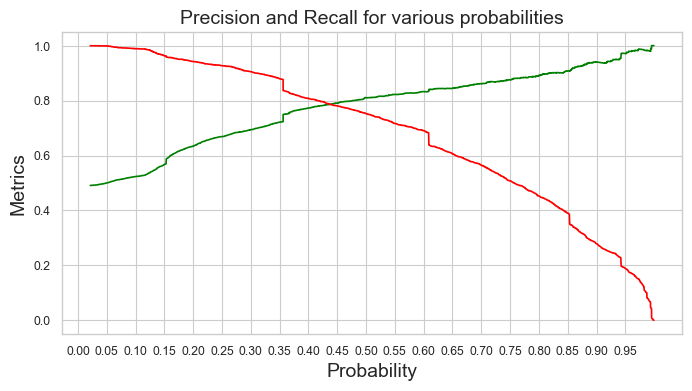

In [80]:
# Plot the Precision / Recall tradeoff chart
sns.set_style("whitegrid")
sns.set_context("paper")

plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Precision and Recall for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

###  5. Model Validation
The next step is to validate the model with the test dataset.

The following are the steps invoved:

- Fit the Numeric features of the Test dataset with the Scaler method.
- Making Predictions on the X_test dataset.
- Create a Dataset with the Prospect ID and the conversion probability for the test dataset.
- Generate the Lead Score for the test dataset based on the predicted probability from the model.
- Get the final Predicted values using the optimal threshold value.
- Get the Final evaluation Metrics for the test dataset with the actual converted values and final predicted values.

#### Making Predictions for the Test Dataset

In [81]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8280,0,2.0,498,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5557,0,9.0,1637,9.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
565,0,9.0,888,9.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6941,0,2.0,72,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6943,0,7.0,1591,7.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Fit the Numeric features of the Test dataset with the Scaler method

In [82]:
# Fit the Numeric features of the Test dataset with the Scaler method
numFeatures = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[numFeatures] = scaler.transform(X_test[numFeatures])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8280,0,0.017391,0.219190,0.036364,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5557,0,0.078261,0.720511,0.163636,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
565,0,0.078261,0.390845,0.163636,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6941,0,0.017391,0.031690,0.018182,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6943,0,0.060870,0.700264,0.127273,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [83]:
X_test.shape

(1918, 43)

In [84]:
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Making Predictions on the X_test dataset using the final model

In [85]:
# Making Predictions on the X_test dataset

X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_View in browser link Clicked,What is your current occupation_Student,What is your current occupation_Working Professional
8280,0,0.017391,0.219190,0.036364,0,0,0,0,0,0,0,0,0,0,0,0
5557,0,0.078261,0.720511,0.163636,0,0,0,0,0,0,0,0,0,0,0,0
565,0,0.078261,0.390845,0.163636,0,0,0,0,0,0,0,0,0,0,1,0
6941,0,0.017391,0.031690,0.018182,0,0,0,0,0,0,0,0,0,0,0,0
6943,0,0.060870,0.700264,0.127273,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
y_test_pred = res.predict(X_test_sm)


In [87]:
y_test_pred[:5]


8280    0.268592
5557    0.746732
565     0.409942
6941    0.143820
6943    0.739425
dtype: float64

#### Creating a Dataset with the Prospect ID and the conversion probability for the test dataset

In [88]:
# Converting y_pred to a dataframe from an array
y_test_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_pred_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_testest_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_test_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0.268592,8280
1,0,0.746732,5557
2,1,0.409942,565
3,0,0.143820,6941
4,0,0.739425,6943
5,0,0.642330,7278
6,0,0.219016,7429
7,1,0.356049,3376
8,1,0.636354,5602
9,0,0.136159,1998


#### Generating the Lead Score for the test dataset based on the predicted probability from the model



In [89]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8280,0,0.268592,27
1,5557,0,0.746732,75
2,565,1,0.409942,41
3,6941,0,0.143820,14
4,6943,0,0.739425,74


#### Get the final Predicted values using the optimal threshold value


In [90]:
# Predict the final y values based on the threshold of 0.43
y_test_pred_final['final_Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.43 else 0)

y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8280,0,0.268592,27,0
1,5557,0,0.746732,75,1
2,565,1,0.409942,41,0
3,6941,0,0.143820,14,0
4,6943,0,0.739425,74,1


#### Final Evaluation Metrics for the Test Dataset


Get the Final evaluation Metrics for the test dataset with the actual converted values and final predicted values

In [91]:
# Get all the necessary Metrics for the Test dataset 

print (f'The Final Evaluation Metrics for the test Dataset: ')
print (f'---------------------------------------------------')
get_metrics(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])

The Final Evaluation Metrics for the test Dataset: 
---------------------------------------------------
The Confusion Matrix is 
 [[800 209]
 [207 702]]
The Accuracy is    : 0.78 (0.7831074035453598)
The Sensitivity is : 0.77 (0.7722772277227723)
The Specificity is : 0.79 (0.7928642220019821)
The Precision is   : 0.77 (0.7705817782656421)
The Recall is      : 0.79 (0.7928642220019821)
The f1 score is    : 0.78 (0.7815642139337201)
The False Positive Rate is       : 0.21 (0.20713577799801783)
The Positive Predictive Value is : 0.77 (0.7705817782656421)
The Negative Predictive Value is : 0.79 (0.7944389275074478)


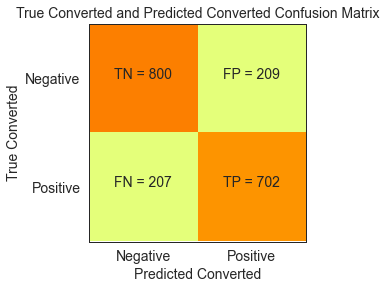

In [92]:
# Plot Confusion metrics for final predicted for test data

plot_confusion_metrics(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

#### Classification report for Test dataset

In [93]:
# Print the classification report for the Test Dataset
print (classification_report(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1009
           1       0.77      0.77      0.77       909

    accuracy                           0.78      1918
   macro avg       0.78      0.78      0.78      1918
weighted avg       0.78      0.78      0.78      1918



#### Assigning the Lead score for each Prospect ID from the original data

The final step is to merge the datasets from Train and Test datasets with the predicted Lead Score and attach the Lead score to the original dataset.

In [94]:
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
4453,1,0.898313,4453,1,1,1,1,1,1,1,1,1,1,0,1,90
9205,1,0.822929,9205,1,1,1,1,1,1,1,1,1,1,0,1,82
5854,1,0.366308,5854,0,1,1,1,1,0,0,0,0,0,0,0,37
6655,0,0.329706,6655,0,1,1,1,1,0,0,0,0,0,0,0,33
443,1,0.144179,443,0,1,1,0,0,0,0,0,0,0,0,0,14


In [95]:
# Create Dataset with y_train Prospect ID and Lead score
y_train_score = y_train_pred_final[['Prospect ID','Lead_Score']]

# Create Dataset with y_test Prospect ID and Lead score
y_test_score = y_test_pred_final[['Prospect ID','Lead_Score']]

# Concatenate the y_train scores and the y_test scores
df_score = pd.concat([y_train_score, y_test_score], ignore_index=True)

# Set the index of the final score dataset as the Prospect ID to concatenate the score dataset to the original data
df_score.set_index('Prospect ID', inplace=True)

# Inner Join the Original Leads dataset with the scores dataset. This will add a new column 'Lead_Score' to the 
# Original dataset. 
df_orig = df_orig.join(df_score['Lead_Score'])

df_orig.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,36.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,36.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,75.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,20.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,49.0


#### Determining Feature Importance

Selecting the coefficients of the selected features from our final model excluding the intercept.

In [96]:
pd.options.display.float_format = '{:.2f}'.format
model_params = res.params[1:]
model_params

Do Not Email                                            -1.43
TotalVisits                                              4.62
Total Time Spent on Website                              4.53
Page Views Per Visit                                    -3.68
Lead Origin_Lead Add Form                                3.70
Lead Source_Olark Chat                                   1.35
Lead Source_Welingak Website                             2.26
Last Activity_Converted to Lead                         -0.96
Last Activity_Email Bounced                             -1.28
Last Activity_Form Submitted on Website                 -0.51
Last Activity_Had a Phone Conversation                   2.23
Last Activity_Olark Chat Conversation                   -1.12
Last Activity_SMS Sent                                   1.03
Last Activity_View in browser link Clicked             -21.18
What is your current occupation_Student                  0.05
What is your current occupation_Working Professional     2.60
dtype: f

#### Getting a relative coeffient value for all the features based on the feature with the highest coefficient.

In [97]:
#feature_importance = abs(new_params)

feature_importance = model_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                            -30.91
TotalVisits                                             100.00
Total Time Spent on Website                              98.09
Page Views Per Visit                                    -79.64
Lead Origin_Lead Add Form                                80.12
Lead Source_Olark Chat                                   29.21
Lead Source_Welingak Website                             49.03
Last Activity_Converted to Lead                         -20.90
Last Activity_Email Bounced                             -27.70
Last Activity_Form Submitted on Website                 -10.98
Last Activity_Had a Phone Conversation                   48.33
Last Activity_Olark Chat Conversation                   -24.24
Last Activity_SMS Sent                                   22.40
Last Activity_View in browser link Clicked             -458.81
What is your current occupation_Student                   1.02
What is your current occupation_Working Professional   

#### Sorting the feature variables based on their relative coefficient values.


In [98]:
# Sort the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx


Do Not Email                                            13
TotalVisits                                              3
Total Time Spent on Website                              0
Page Views Per Visit                                     8
Lead Origin_Lead Add Form                               11
Lead Source_Olark Chat                                   7
Lead Source_Welingak Website                             9
Last Activity_Converted to Lead                         14
Last Activity_Email Bounced                             12
Last Activity_Form Submitted on Website                  5
Last Activity_Had a Phone Conversation                  10
Last Activity_Olark Chat Conversation                    6
Last Activity_SMS Sent                                  15
Last Activity_View in browser link Clicked               4
What is your current occupation_Student                  2
What is your current occupation_Working Professional     1
dtype: int64

#### Plotting the feature variables based on their relative coefficient values.

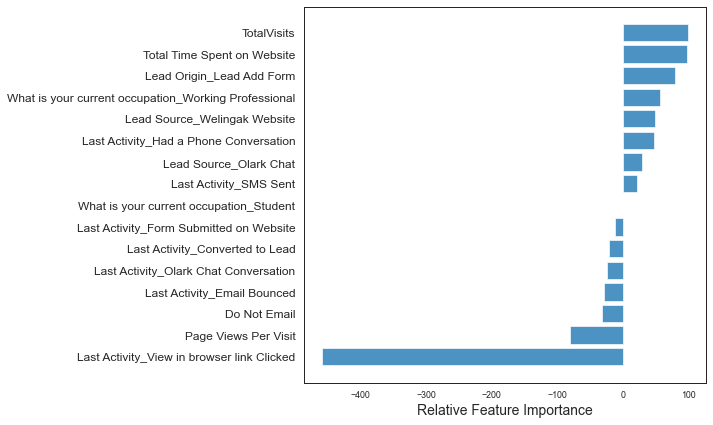

In [99]:
# Plot to show the realtive Importance of each feature in the model 
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[cols].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

###  6. Observations

- The Final Evaluation Metrics for the train Dataset:

- The Accuracy is : 0.79
- The Sensitivity is : 0.79
- The Specificity is : 0.80
- The Precision is : 0.78
- The Recall is : 0.80
- The f1 score is : 0.79

- The Final Evaluation Metrics for the test Dataset:

- The Accuracy is : 0.78
- The Sensitivity is : 0.77
- The Specificity is : 0.79
- The Precision is : 0.77
- The Recall is : 0.79
- The f1 score is : 0.78

### 7. Recommendations

#### From the various outputs, we can infer the following regarding the X-Education Lead Conversion:-

- Total visits on the website: Leads who have visited the website quite often can be considered to be hot leads and the chances of conversion is quite high.
- The total time spent on the Website is high: Leads who have spent more time on the website are having high chances of getting converted.
- Lead Origin_Lead Add Form: Leads who have responded through Lead Add Forms have had a higher chances of getting converted
- Current Occupation-Working professional: Leads who are working professionals have high chances of getting converted.